# User Inputs

In [1]:
#==============
# Load Packages
#==============

# jupyter specifications
from IPython.core.interactiveshell import InteractiveShell
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from simulation import *
pd.options.mode.chained_assignment = None 

#===============
# Settings and User Inputs
#===============

#--------
# Database Login Info
#--------

# postgres login information
pg_log = {
    'USER': 'postgres',
    'PASSWORD': 'Ctdim#1bf!!!!!',
    'HOST': 'localhost',
    'PORT': '5432', 
    'DATABASE_NAME': 'fantasyfootball'
}

# create engine for connecting to database
engine = create_engine('postgres+psycopg2://{}:{}@{}:{}/{}'.format(pg_log['USER'], pg_log['PASSWORD'], pg_log['HOST'],
                                                                   pg_log['PORT'], pg_log['DATABASE_NAME']))

# specify schema and table to write out intermediate results
table_info = {
    'engine': engine,
    'schema': 'websitedev',
}

np.random.seed(123)

#--------
# League Settings
#--------

# set year
year = 2019

# set the number of simulation iterations
iterations = 1000

# define point values for all statistical categories
pass_yd_per_pt = 0.04 
pass_td_pt = 4
int_pts = -2
sacks = -1
rush_yd_per_pt = 0.1 
rec_yd_per_pt = 0.1
rush_rec_td = 7
ppr = .5

# creating dictionary containing point values for each position
pts_dict = {}
pts_dict['QB'] = [pass_yd_per_pt, pass_td_pt, rush_yd_per_pt, rush_rec_td, int_pts, sacks]
pts_dict['RB'] = [rush_yd_per_pt, rec_yd_per_pt, ppr, rush_rec_td]
pts_dict['WR'] = [rec_yd_per_pt, ppr, rush_rec_td]
pts_dict['TE'] = [rec_yd_per_pt, ppr, rush_rec_td]

In [2]:
def _bar_center_zero(self, s, color_positive, width):

    # Either the min or the max should reach the edge (50%, centered on zero)
    m = max(abs(s.min()),abs(s.max()))
    normed = s * 60 * width / (100 * m)
    base = 'width: 10em; height: 80%;'

    attrs_pos = (base+ 'background: linear-gradient(90deg, transparent 0%, transparent 5%, {c} 0%, {c} {w}%, '
                'transparent {w}%)')

    return [attrs_pos.format(c=color_positive,  w=(5+x)) for x in normed]

def bar_excel(self, axis=0, color_positive='#5FBA7D', width=100):

    self.apply(self._bar_center_zero, axis=axis, color_positive=color_positive, width=width)
    
    return self

# create the bar charts within the
pd.io.formats.style.Styler._bar_center_zero = _bar_center_zero
pd.io.formats.style.Styler.bar_excel = bar_excel

# Pull in Data

In [3]:
# instantiate simulation class and add salary information to data
sim = FootballSimulation(pts_dict, table_info, 2019, iterations)
d = sim.return_data()

In [4]:
plt.style.use('classic')
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-ticks')
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['grid.linewidth'] = .1
plt.rcParams['grid.color'] = '0.4'
plt.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['ytick.labelsize'] = 13
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.labelcolor'] = '0'
plt.rcParams['savefig.transparent'] = True
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['xtick.major.top'] = False
plt.rcParams['ytick.major.right'] = False
plt.rcParams['figure.figsize'] = (6.4, 3.6)
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['axes.titlesize'] ='large'

# Point Distributions

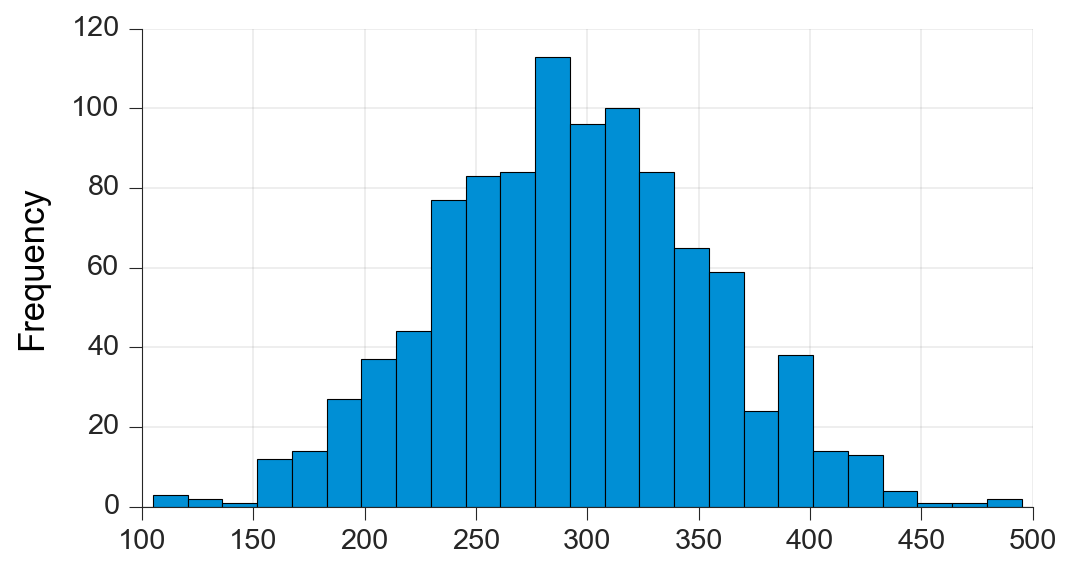

In [5]:
d.loc[d.index == 'Alvin Kamara'].iloc[0, 1:999].plot.hist(bins=25, linewidth=0.5, edgecolor='black');

# Salary Distributions

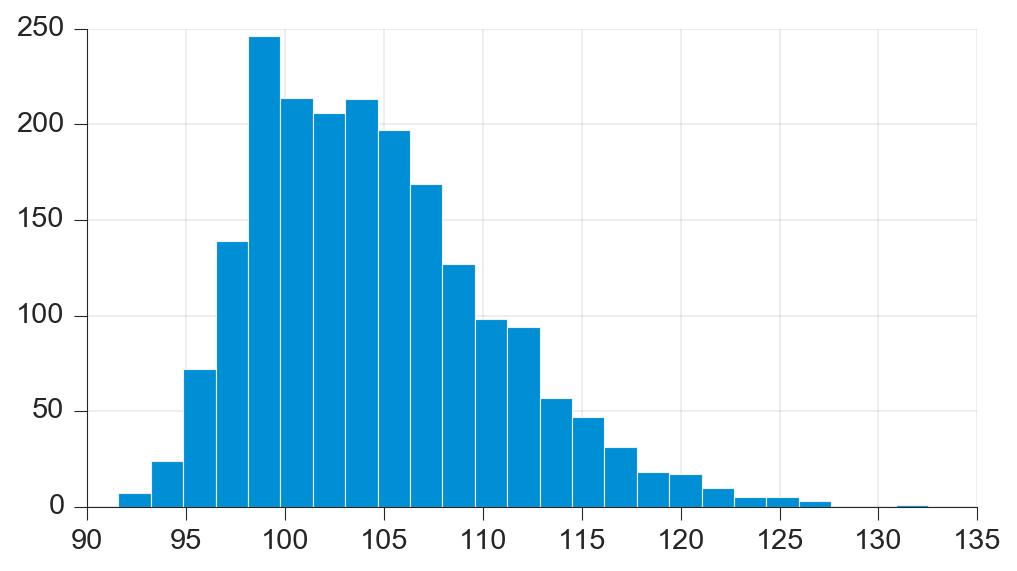

In [6]:
sal = d[d.index=='Alvin Kamara'].iloc[0, -1]
plt.hist(sal*(1+(skewnorm.rvs(5, size=iterations*2)*.1)), bins=25);

In [11]:
# set league information, included position requirements, number of teams, and salary cap
league_info = {}
league_info['pos_require'] = {'QB': 1, 'RB': 2, 'WR': 2, 'TE': 1, 'FLEX': 2}
league_info['num_teams'] = 12
league_info['initial_cap'] = 293
league_info['salary_cap'] = 293

#------------------
# For Beta Keepers
#------------------

# input information for players and their associated salaries selected by other teams
to_drop = {}
to_drop['players'] = ['Michael Thomas', 'Damien Williams',
                      'Mike Evans', 'Robert Woods',
                      'Adam Thielen', 'Ezekiel Elliott', 'Davante Adams', 'Adrian Peterson',
                      'James Conner', 'Joe Mixon', 'Devonta Freeman', 'Saquon Barkley',
                      'Tyreek Hill', 'Chris Godwin', 'Patrick Mahomes', 'Tyler Lockett', 
                      'Christian McCaffrey', 'Travis Kelce', 'Tarik Cohen', 'Sony Michel',
                      'Kyle Rudolph']
#                       'Dalvin Cook', 'LeSean McCoy',  'Zach Ertz', 'David Johnson',
#                       "Le'Veon Bell", 'Melvin Gordon', 'Odell Beckham', 'Amari Cooper',
#                       'Antonio Brown', 'Leonard Fournette', 'Julio Jones', 'Deshaun Watson',
#                        'Lamar Miller', 'Todd Gurley', 'Keenan Allen', 'Chris Carson',
#                       'A.J. Green', 'Aaron Rodgers', 'Derrius Guice', 'Curtis Samuel',
#                        'Derrick Henry', 'George Kittle', 'T.Y. Hilton', 'Kerryon Johnson',
#                        'Stefon Diggs', 'Cooper Kupp', 'Brandin Cooks', 'Marlon Mack',
#                       'Kenyan Drake', 'Tevin Coleman', 'Julian Edelman', 'Josh Jacobs',
#                       'James White', 'Mark Ingram', 'Aaron Jones', 'Kenny Golladay', 
#                        'Drew Brees', 'Matt Ryan', 'Phillip Lindsay', 'Royce Freeman', 
#                        'Tyler Boyd', 'Austin Hooper', 'Alshon Jeffery', 'Kareem Hunt',
#                        'Miles Sanders', 'Austin Ekeler'
#                     ]

to_drop['salaries'] = [
                        55, 16, 
                       65, 19,  
                       46, 114, 71, 11, 
                       11, 67, 11, 111, 
                       36, 11, 11, 11, 
                       77, 46, 12, 15,
                        1
                        ]
#                        70, 13, 48, 94,
#                        96, 86, 95, 58,
#                        68, 72, 90, 22,
#                        12, 84, 67, 45,
#                         29, 10, 12, 22,
#                        52, 38, 52, 74,
#                         55, 23, 55, 42,
#                         13, 20, 55, 57,
#                        22, 36, 54, 40,
#                         8, 12, 35, 5, 
#                         23, 8, 20, 12,
#                         21, 12
#                       ]

# input information for players and their associated salaries selected by your team
to_add = {}
to_add['players'] = ['Alvin Kamara', 'Nick Chubb', 'DeAndre Hopkins', 'JuJu Smith-Schuster',
                     'Hunter Henry'
                     ]
to_add['salaries'] = [35, 18, 97, 73, 15]

# to_drop = {}
# to_drop['players'] = []
# to_drop['salaries'] = []


results = sim.run_simulation(league_info, to_drop, to_add, iterations=iterations)
avg_sal = sim.show_most_selected(to_add, iterations, num_show=30)
avg_sal.style.bar_excel(color_positive='#5FBA7D')

Remaining Salary: 56.0
Remaining Positions Required: {'QB': 1, 'RB': 0, 'WR': 0, 'TE': 0, 'FLEX': 2}
Current Inflation: 1.17


,Percent Drafted,Average Salary,Expected Salary Diff
Duke Johnson,12.2,6.3,0.4
Mark Ingram,9.5,35.1,2.3
Lamar Jackson,9.4,2.6,0.2
Russell Wilson,8.6,7.6,0.6
Dak Prescott,7.9,7.6,0.5
Kenyan Drake,7.7,26.3,1.8
Aaron Rodgers,7.7,22.7,1.7
Phillip Lindsay,7.5,17.8,1.4
Aaron Jones,7.3,45.8,2.5
Cam Newton,7.2,7.6,0.6
